In [1]:
import astropy.coordinates as coord
import astropy.units as u
from astropy.table import Table, join, vstack
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import ascii

import gala.coordinates as gc
import gala.dynamics as gd
from gala.units import galactic
from pyia import GaiaData

In [2]:
gd1_g = GaiaData('../../gd1-dr2/data/gd1-master.fits')
gd1_g = gd1_g[gd1_g.pm_mask & gd1_g.gi_cmd_mask]

In [3]:
m67 = coord.SkyCoord.from_name('M67')
m67_c = m67.transform_to(gc.GD1)

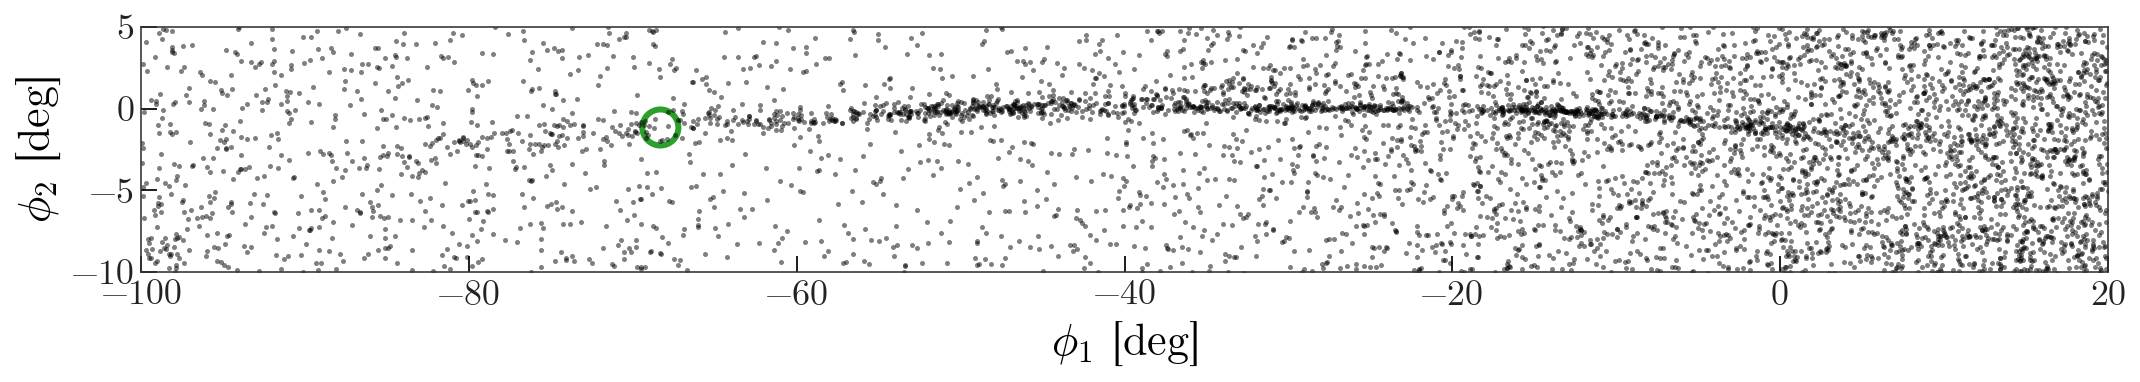

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(15, 3))

ax.plot(gd1_g.phi1, gd1_g.phi2, 
        marker='.', ls='none', alpha=0.5, color='k')

circ = mpl.patches.Circle((m67_c.phi1.degree, m67_c.phi2.degree), radius=1.1,
                          facecolor='none', edgecolor='tab:green', linewidth=3)
ax.add_patch(circ)

ax.set_xlim(-100, 20)
ax.set_ylim(-10, 5)
ax.set_aspect('equal')

ax.set_xlabel(r'$\phi_1$ [deg]')
ax.set_ylabel(r'$\phi_2$ [deg]')

fig.tight_layout()
fig.savefig('../plots/GD1-M67.png', dpi=200)